In [1]:
import os
import glob
import numpy as np
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import LinearSVC  # Using LinearSVC for faster performance
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from PIL import Image

# Define the folder names for the dataset
folder_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

image_data = []
labels = []

# Set the path to your dataset
dataset_path = r'C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET'

# Load the image data and labels
for folder_name in folder_names:
    folder_path = os.path.join(dataset_path, folder_name)
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    
    for image_file in image_files:
        image = np.array(Image.open(image_file))
        image_data.append(image)
        
        if folder_name == 'Mild_Demented':
            labels.append(0)
        elif folder_name == 'Moderate_Demented':
            labels.append(1)
        elif folder_name == 'Non_Demented':
            labels.append(2)
        elif folder_name == 'Very_Mild_Demented':
            labels.append(3)

# Convert lists to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)
print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

# Reshape the image data
image_data = image_data.reshape(image_data.shape[0], -1)

n_folds = 3  # Reduced number of folds for faster performance
kf = KFold(n_folds, shuffle=True, random_state=42)

accuracy_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(image_data):
    X_train, X_test = image_data[train_index], image_data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.95)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Apply ANOVA for feature selection
    anova = SelectKBest(f_classif, k=50)  # Reduced number of features for faster performance
    anova.fit(X_train_pca, y_train)
    X_train_anova = anova.transform(X_train_pca)
    X_test_anova = anova.transform(X_test_pca)

    # Define the SVM model
    svm = LinearSVC(max_iter=1000)  # Using LinearSVC for faster performance

    # Define the parameter space for Bayesian optimization
    param_space = {
        'C': (1e-6, 1e+6, 'log-uniform'),  # Regularization parameter
        'penalty': ['l1', 'l2']  # Penalty parameter for LinearSVC
    }

    # Create a Bayesian search for hyperparameter optimization
    bayes_search = BayesSearchCV(svm, param_space, n_iter=10, cv=3, n_jobs=-1, random_state=42)
    bayes_search.fit(X_train_anova, y_train)

    # Make predictions and evaluate accuracy
    y_pred = bayes_search.predict(X_test_anova)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print average accuracy
print(f'Average Accuracy: {np.mean(accuracy_scores):.3f}')

Image data shape: (6400, 128, 128)
Labels shape: (6400,)
Average Accuracy: 0.642


c:\Users\suhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [2]:
import os
import glob
import numpy as np
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import LinearSVC  # Using LinearSVC for faster performance
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from PIL import Image

# Define the folder names for the dataset
folder_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

image_data = []
labels = []

# Set the path to your dataset
dataset_path = r'C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET'

# Load the image data and labels
for folder_name in folder_names:
    folder_path = os.path.join(dataset_path, folder_name)
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    
    for image_file in image_files:
        image = np.array(Image.open(image_file))
        image_data.append(image)
        
        if folder_name == 'Mild_Demented':
            labels.append(0)
        elif folder_name == 'Moderate_Demented':
            labels.append(1)
        elif folder_name == 'Non_Demented':
            labels.append(2)
        elif folder_name == 'Very_Mild_Demented':
            labels.append(3)

# Convert lists to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)
print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

# Reshape the image data
image_data = image_data.reshape(image_data.shape[0], -1)

n_folds = 5  # Reduced number of folds for faster performance
kf = KFold(n_folds, shuffle=True, random_state=42)

accuracy_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(image_data):
    X_train, X_test = image_data[train_index], image_data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.95)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Apply ANOVA for feature selection
    anova = SelectKBest(f_classif, k=50)  # Reduced number of features for faster performance
    anova.fit(X_train_pca, y_train)
    X_train_anova = anova.transform(X_train_pca)
    X_test_anova = anova.transform(X_test_pca)

    # Define the SVM model
    svm = LinearSVC(max_iter=1000)  # Using LinearSVC for faster performance

    # Define the parameter space for Bayesian optimization
    param_space = {
        'C': (1e-6, 1e+6, 'log-uniform'),  # Regularization parameter
        'penalty': ['l1', 'l2']  # Penalty parameter for LinearSVC
    }

    # Create a Bayesian search for hyperparameter optimization
    bayes_search = BayesSearchCV(svm, param_space, n_iter=10, cv=3, n_jobs=-1, random_state=42)
    bayes_search.fit(X_train_anova, y_train)

    # Make predictions and evaluate accuracy
    y_pred = bayes_search.predict(X_test_anova)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print average accuracy
print(f'Average Accuracy: {np.mean(accuracy_scores):.3f}')

Image data shape: (6400, 128, 128)
Labels shape: (6400,)


c:\Users\suhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\suhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\suhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Average Accuracy: 0.638


c:\Users\suhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [1]:
import os
import glob
import numpy as np
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import LinearSVC  # Using LinearSVC for faster performance
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from PIL import Image

# Define the folder names for the dataset
folder_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

image_data = []
labels = []

# Set the path to your dataset
dataset_path = r'C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET'

# Load the image data and labels
for folder_name in folder_names:
    folder_path = os.path.join(dataset_path, folder_name)
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    
    for image_file in image_files:
        image = np.array(Image.open(image_file))
        image_data.append(image)
        
        if folder_name == 'Mild_Demented':
            labels.append(0)
        elif folder_name == 'Moderate_Demented':
            labels.append(1)
        elif folder_name == 'Non_Demented':
            labels.append(2)
        elif folder_name == 'Very_Mild_Demented':
            labels.append(3)

# Convert lists to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)
print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

# Reshape the image data
image_data = image_data.reshape(image_data.shape[0], -1)

n_folds = 3  # Reduced number of folds for faster performance
kf = KFold(n_folds, shuffle=True, random_state=42)

accuracy_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(image_data):
    X_train, X_test = image_data[train_index], image_data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.95)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Apply ANOVA for feature selection
    anova = SelectKBest(f_classif, k=50)  # Reduced number of features for faster performance
    anova.fit(X_train_pca, y_train)
    X_train_anova = anova.transform(X_train_pca)
    X_test_anova = anova.transform(X_test_pca)

    # Define the SVM model
    svm = LinearSVC(max_iter=10000)  # Increased number of iterations

    # Define the parameter space for Bayesian optimization
    param_space = {
        'C': (1e-6, 1e+6, 'log-uniform'),  # Regularization parameter
        'penalty': ['l1', 'l2']  # Penalty parameter for LinearSVC
    }

    # Create a Bayesian search for hyperparameter optimization
    bayes_search = BayesSearchCV(svm, param_space, n_iter=10, cv=3, n_jobs=-1, random_state=42)
    bayes_search.fit(X_train_anova, y_train)

    # Make predictions and evaluate accuracy
    y_pred = bayes_search.predict(X_test_anova)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print average accuracy
print(f'Average Accuracy: {np.mean(accuracy_scores):.3f}')

Image data shape: (6400, 128, 128)
Labels shape: (6400,)
Average Accuracy: 0.642


c:\Users\suhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Image data shape: (6400, 128, 128)
Labels shape: (6400,)
Principal Components (Loadings):
[[ 4.95997920e-16  1.43282689e-16 -1.56085747e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.51512975e-16 -1.59126902e-17  1.42292928e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.36456110e-17  3.42486262e-17  2.97569299e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-5.31423851e-17  6.33211215e-17 -2.22443221e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.23122212e-16  1.18207463e-16 -2.43413879e-16 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-5.06215410e-17 -5.49330457e-17  2.23568934e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]

Explained Variance Ratio:
PC1: 0.2216
PC2: 0.1058
PC3: 0.0788
PC4: 0.0328
PC5: 0.0222
PC6: 0.0140
PC7: 0.0133
PC8: 0.0105
PC9: 0.0074
PC10: 0.0070
PC11: 0.0063
PC12: 0.0056
PC13: 0.0052
PC14: 0.0049
PC15: 0.0047
PC16: 0.0045
PC17: 0.0043
PC18: 0.0041
PC19: 0.0041
PC20: 0.0

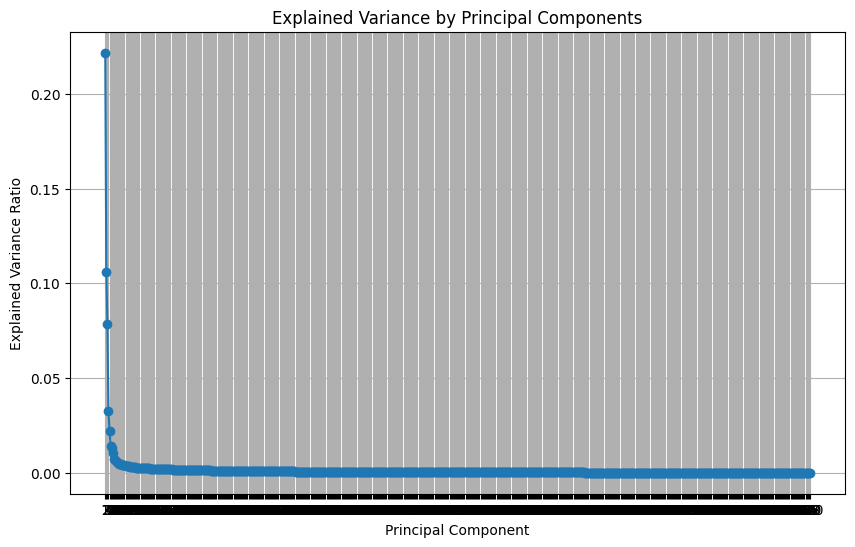

PCA Data Shape: (6400, 660)


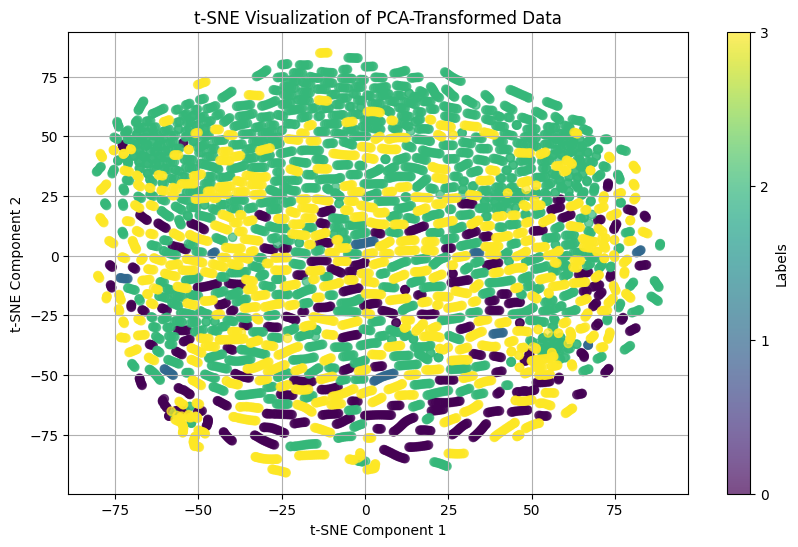

ValueError: cannot reshape array of size 16384 into shape (128,128,3)

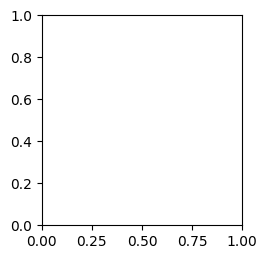

In [2]:
import os
import glob
import numpy as np
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define the folder names for the dataset
folder_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

image_data = []
labels = []

# Set the path to your dataset
dataset_path = r'C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET'

# Load the image data and labels
for folder_name in folder_names:
    folder_path = os.path.join(dataset_path, folder_name)
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    
    for image_file in image_files:
        image = np.array(Image.open(image_file))
        image_data.append(image)
        
        if folder_name == 'Mild_Demented':
            labels.append(0)
        elif folder_name == 'Moderate_Demented':
            labels.append(1)
        elif folder_name == 'Non_Demented':
            labels.append(2)
        elif folder_name == 'Very_Mild_Demented':
            labels.append(3)

# Convert lists to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)
print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

# Reshape the image data
image_data = image_data.reshape(image_data.shape[0], -1)

# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca.fit(image_data)

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print the results
print("Principal Components (Loadings):")
print(principal_components)

print("\nExplained Variance Ratio:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

# Optional: Visualize Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Transform the data into the PCA space
pca_data = pca.transform(image_data)

# Print the shape of the transformed data
print("PCA Data Shape:", pca_data.shape)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(pca_data)

# Visualize the t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of PCA-Transformed Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=[0, 1, 2, 3], label='Labels')
plt.xticks()
plt.yticks()
plt.grid()
plt.show()

def display_initial_images(image_data, indices, n_cols=5):
    n_samples = len(indices)
    n_rows = (n_samples + n_cols - 1) // n_cols  # Calculate number of rows needed
    plt.figure(figsize=(15, n_rows * 3))
    
    for i, idx in enumerate(indices):
        plt.subplot(n_rows, n_cols, i + 1)
        image = image_data[idx].reshape(128, 128, 3)  # Reshape to 3D array
        plt.imshow(image)  # Display original image
        plt.axis('off')
        plt.title(f'Index: {idx}')
    
    plt.tight_layout()
    plt.show()

def display_sample_images(image_data, indices, n_cols=5):
    n_samples = len(indices)
    n_rows = (n_samples + n_cols - 1) // n_cols  # Calculate number of rows needed
    plt.figure(figsize=(15, n_rows * 3))
    
    for i, idx in enumerate(indices):
        plt.subplot(n_rows, n_cols, i + 1)
        image = image_data[idx].reshape(128, 128)  # Reshape to 2D array
        plt.imshow(image, cmap='gray')  # Display as grayscale image
        plt.axis('off')
        plt.title(f'Index: {idx}')
    
    plt.tight_layout()
    plt.show()

# Example: Retrieve and display initial images corresponding to the first 10 points
sample_indices = np.arange(10)  # Change this to any indices you want to visualize
display_initial_images(image_data, sample_indices)
# Example: Retrieve and display images corresponding to the first 10 points in the t-SNE results
sample_indices = np.arange(10)  # Change this to any indices you want to visualize
display_sample_images(image_data, sample_indices)